In [1]:
#!cp /content/plot_confusion_matrix.py /content/drive/My\ Drive/CIS508

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
#Read training data file
trainfile = r'train.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'test.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

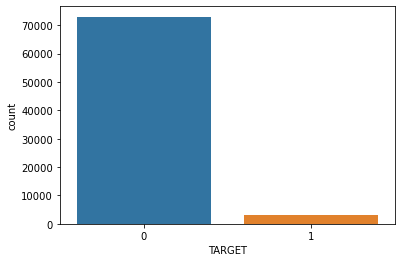

In [3]:
#Data Description
trainData.info()
trainData.groupby('TARGET').size()
sns.countplot(trainData['TARGET'])


In [4]:
# To check number of null values
trainData.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [5]:
#Copy Train data without target and ID
X_Train = np.asarray(trainData.drop(["TARGET","ID"],axis=1))
X_Train = preprocessing.StandardScaler().fit(X_Train).transform(X_Train)

#Select just Target Column
Y_Train = np.asarray(trainData['TARGET'])



In [6]:


# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, test_size = .25, 
                                                    stratify=Y_Train,random_state = 1)

#Create Decision Tree Classifier
#Trial 3
clf=DecisionTreeClassifier(max_depth=80, max_leaf_nodes=50,splitter='random',
                           class_weight='balanced',min_samples_leaf=760)

#Apply Classifier on Train and Target - train decision tree model
clf.fit(X_train,Y_train)



DecisionTreeClassifier(class_weight='balanced', max_depth=80, max_leaf_nodes=50,
                       min_samples_leaf=760, splitter='random')

In [7]:

# check accuracy on training set
X_Pred_train = clf.predict(X_train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_train,X_Pred_train))

# check accuracy on test set
X_Pred_test = clf.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", accuracy_score(Y_test,X_Pred_test))



TRAIN Accuracy: 0.7023064105937034
TEST Accuracy: 0.7046566692975533


In [8]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(confusion_matrix(Y_train, X_Pred_train))
print()

#Print Classification Report
print('Printing the precision and recall, among other metrics')
print(classification_report(Y_train,X_Pred_train))


[[38376 16383]
 [  590  1666]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     54759
           1       0.09      0.74      0.16      2256

    accuracy                           0.70     57015
   macro avg       0.54      0.72      0.49     57015
weighted avg       0.95      0.70      0.79     57015



In [9]:
#Get Class Prediction as a data frame with header as Prediction
pred=pd.DataFrame(clf.predict(X_train),columns=['TARGET'])


pred.head()


,TARGET
0,0
1,0
2,0
3,1
4,0


In [10]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(clf.predict_proba(X_Train))

pred_Probability.head()

,0,1
0,0.688570,0.311430
1,0.854519,0.145481
2,0.859376,0.140624
3,0.606394,0.393606
4,0.947757,0.052243


In [11]:
#Visualize decision tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_63 <= -0.45
|   |--- feature_193 <= 0.48
|   |   |--- class: 1
|   |--- feature_193 >  0.48
|   |   |--- feature_1 <= -0.08
|   |   |   |--- feature_151 <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- feature_151 >  0.01
|   |   |   |   |--- feature_1 <= -0.63
|   |   |   |   |   |--- feature_1 <= -0.72
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  -0.72
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.63
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.08
|   |   |   |--- feature_79 <= -0.97
|   |   |   |   |--- class: 1
|   |   |   |--- feature_79 >  -0.97
|   |   |   |   |--- feature_1 <= 1.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1.06
|   |   |   |   |   |--- class: 1
|--- feature_63 >  -0.45
|   |--- feature_28 <= 1.40
|   |   |--- feature_24 <= -0.49
|   |   |   |--- feature_33 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_33 >  0.67
|   |   |  

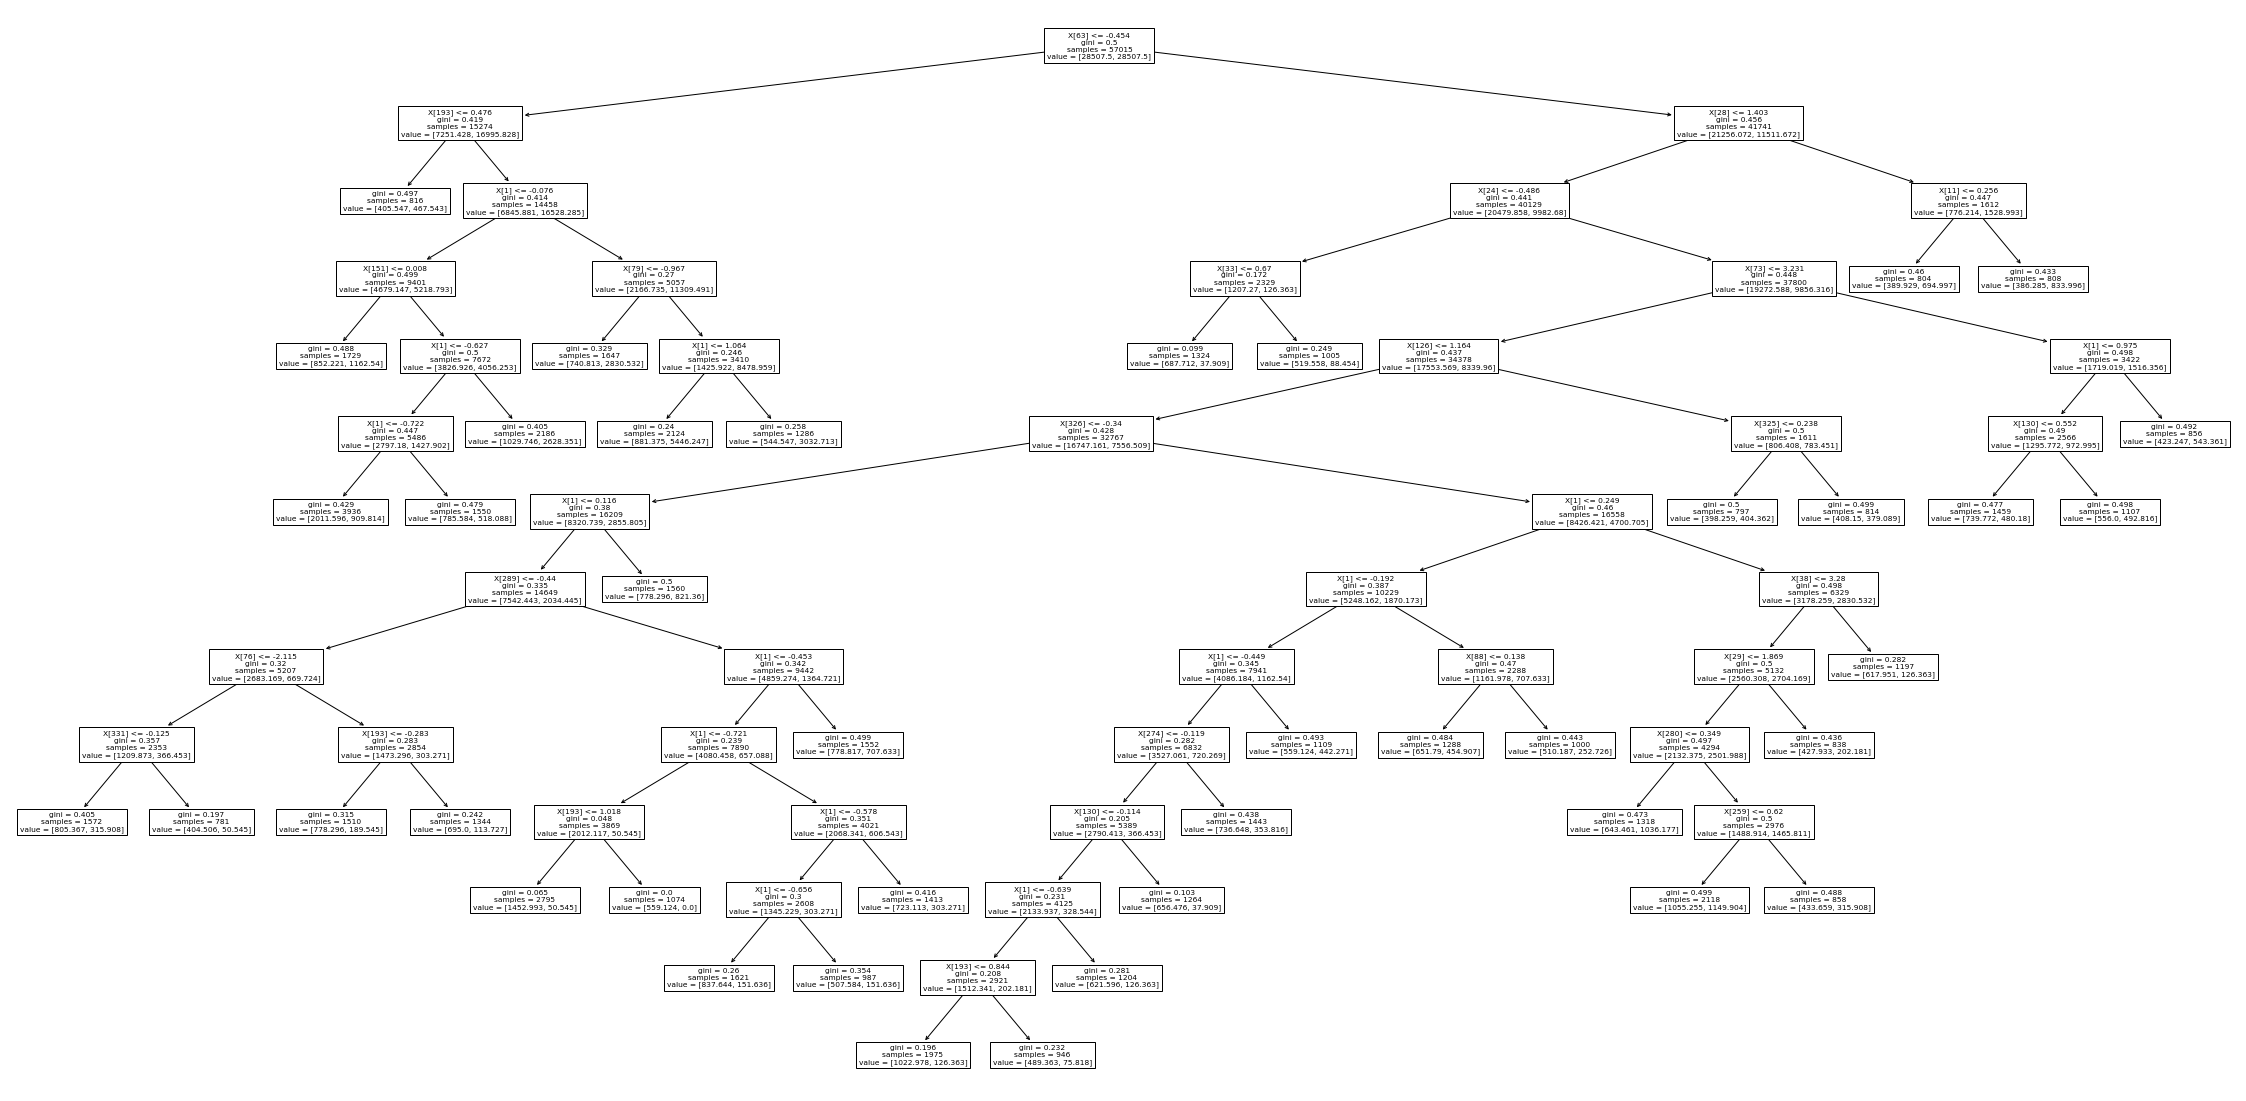

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)


In [13]:
testData_id = testData.ID
Test_X = np.asarray( testData.drop('ID', axis=1))
Test_X = preprocessing.StandardScaler().fit(Test_X).transform(Test_X)
print(Test_X.shape)

(75818, 369)


In [14]:
probs = clf.predict_proba(Test_X)
pred= clf.predict(Test_X)
print(pred)

[0 0 0 ... 0 1 0]


In [15]:
result = pd.DataFrame({"ID":testData_id, "TARGET": pred}).to_csv("result_anuragBhattacharjee_max_leaf_nodes_50.csv",index=False)